In [12]:
import re
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn import svm
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import Binarizer
from sklearn.metrics import accuracy_score, precision_score , recall_score , confusion_matrix
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [56]:
df1=pd.read_csv('C:/1차data/3.22.csv',encoding='cp949')
df1=df1[['고객번호','성별','연령대','거주지역', '경쟁사이용횟수', '멤버쉽보유', '온라인이용횟수','분기증감확인'
         ]]
# df=pd.merge(df1,df, on='고객번호',how='left')
df1


,고객번호,성별,연령대,거주지역,경쟁사이용횟수,멤버쉽보유,온라인이용횟수,분기증감확인
0,1,1,5,1,15,0,0,0
1,2,1,5,0,8,0,0,0
2,3,1,5,0,0,0,0,0
3,4,0,5,1,3,0,0,0
4,6,0,5,3,0,0,0,1
...,...,...,...,...,...,...,...,...
18861,19333,0,1,0,0,1,5,0
18862,19334,1,2,3,30,1,0,0
18863,19335,0,2,0,0,1,0,1
18864,19336,0,2,1,0,0,0,1


In [14]:
dff=pd.read_csv('C:/1차data/RFM테이블.csv',encoding='cp949')
df=pd.merge(df1,dff, on='고객번호',how='left')
df

,고객번호,성별,연령대,거주지역,경쟁사이용횟수,멤버쉽보유,온라인이용횟수,분기증감확인,총구매액,구매빈도,최근구매일
0,1,1,5,1,15,0,0,0,80397041.0,979,10
1,2,1,5,0,8,0,0,0,91717156.0,997,3
2,3,1,5,0,0,0,0,0,3037160.0,1098,10
3,4,0,5,1,3,0,0,0,15711888.0,823,2
4,6,0,5,3,0,0,0,1,22123951.0,1374,2
...,...,...,...,...,...,...,...,...,...,...,...
18861,19333,0,1,0,0,1,5,0,4339816.0,734,4
18862,19334,1,2,3,30,1,0,0,12106990.0,1916,33
18863,19335,0,2,0,0,1,0,1,15255492.0,1643,2
18864,19336,0,2,1,0,0,0,1,26592233.0,389,7


In [85]:
%%time
import pandas as pd
import warnings
warnings.simplefilter("ignore")
df2 = pd.read_excel('C:/1차data/8사분류코드.xlsx', engine="openpyxl")
df2


Wall time: 10.3 s


,고객번호,사분류코드,구매횟수,총구매액
0,1,1,626.0,13674090.0
1,1,2,300.0,65199093.0
2,1,3,1.0,509218.0
3,1,4,52.0,1014640.0
4,2,1,716.0,19553459.0
...,...,...,...,...
66291,19382,2,18.0,395193.0
66292,19382,4,21.0,134320.0
66293,19383,1,120.0,589648.0
66294,19383,2,8.0,475607.0


In [86]:
df2 = pd.pivot_table(df2,
                     index = '고객번호', # 행 위치에 들어갈 열
                     columns = '사분류코드', # 열 위치에 들어갈 열
                     values = ['구매횟수','총구매액'], # 데이터로 사용할 열
                     aggfunc = 'max') # 데이터 집계 함수
df2

구매횟수                          총구매액                                  
사분류코드       1      2    3     4           1           2          3          4
고객번호                                                                         
1       626.0  300.0  1.0  52.0  13674090.0  65199093.0   509218.0  1014640.0
2       716.0  260.0  5.0  16.0  19553459.0  69412816.0  1946464.0   804417.0
3      1096.0    2.0  NaN   NaN   2924361.0    112799.0        NaN        NaN
4       648.0  125.0  1.0  49.0   5170256.0   9696010.0   191459.0   654163.0
5       592.0   34.0  1.0   3.0   7274742.0   3525255.0    58715.0    56448.0
...       ...    ...  ...   ...         ...         ...        ...        ...
19379   446.0   18.0  NaN   6.0   3228209.0   1205945.0        NaN    60878.0
19380   167.0    5.0  NaN   NaN   1676014.0     71878.0        NaN        NaN
19381   545.0   32.0  NaN  24.0   3790287.0   1114684.0        NaN   129183.0
19382   590.0   18.0  NaN  21.0   2807424.0    395193.0        NaN   134320.0
19383   120.0    8.0  NaN   3.0    589648.0    475607.0        NaN   193936.0

[19380 rows x 8 columns]

In [87]:
df2

구매횟수                          총구매액                                  
사분류코드       1      2    3     4           1           2          3          4
고객번호                                                                         
1       626.0  300.0  1.0  52.0  13674090.0  65199093.0   509218.0  1014640.0
2       716.0  260.0  5.0  16.0  19553459.0  69412816.0  1946464.0   804417.0
3      1096.0    2.0  NaN   NaN   2924361.0    112799.0        NaN        NaN
4       648.0  125.0  1.0  49.0   5170256.0   9696010.0   191459.0   654163.0
5       592.0   34.0  1.0   3.0   7274742.0   3525255.0    58715.0    56448.0
...       ...    ...  ...   ...         ...         ...        ...        ...
19379   446.0   18.0  NaN   6.0   3228209.0   1205945.0        NaN    60878.0
19380   167.0    5.0  NaN   NaN   1676014.0     71878.0        NaN        NaN
19381   545.0   32.0  NaN  24.0   3790287.0   1114684.0        NaN   129183.0
19382   590.0   18.0  NaN  21.0   2807424.0    395193.0        NaN   134320.0
19383   120.0    8.0  NaN   3.0    589648.0    475607.0        NaN   193936.0

[19380 rows x 8 columns]

In [88]:
dff=pd.read_csv('C:/1차data/RFM테이블.csv',encoding='cp949')
# df=pd.merge(df1,dff, on='고객번호',how='left')
dff=dff[['고객번호']]
dff

,고객번호
0,1
1,2
2,3
3,4
4,6
...,...
18861,19333
18862,19334
18863,19335
18864,19336


In [89]:
df2=pd.merge(dff,df2, on='고객번호',how='left')
df2

,고객번호,"(구매횟수, 1)","(구매횟수, 2)","(구매횟수, 3)","(구매횟수, 4)","(총구매액, 1)","(총구매액, 2)","(총구매액, 3)","(총구매액, 4)"
0,1,626.0,300.0,1.0,52.0,13674090.0,65199093.0,509218.0,1014640.0
1,2,716.0,260.0,5.0,16.0,19553459.0,69412816.0,1946464.0,804417.0
2,3,1096.0,2.0,NaN,NaN,2924361.0,112799.0,NaN,NaN
3,4,648.0,125.0,1.0,49.0,5170256.0,9696010.0,191459.0,654163.0
4,6,1160.0,158.0,5.0,51.0,9115844.0,11971079.0,343531.0,693497.0
...,...,...,...,...,...,...,...,...,...
18861,19333,609.0,8.0,NaN,117.0,3089640.0,140012.0,NaN,1110164.0
18862,19334,1857.0,43.0,NaN,16.0,10824159.0,1152765.0,NaN,130066.0
18863,19335,1389.0,127.0,NaN,127.0,10323860.0,3055575.0,NaN,1876057.0
18864,19336,53.0,165.0,4.0,167.0,2360560.0,20781966.0,798775.0,2650932.0


In [93]:
df2.to_csv('C:/1차data/8사분류피벗.csv',encoding='cp949',index=False)

In [39]:
df2.to_csv('C:/1차data/8사분류피벗.csv',encoding='cp949',index=False)
df3.to_csv('C:/1차data/8제휴사피벗.csv',encoding='cp949',index=False)
df4.to_csv('C:/1차data/8분기별피벗.csv',encoding='cp949',index=False)

In [94]:
df3

구매횟수                              총구매액                        \
제휴사        A      B       C      D           A          B          C   
고객번호                                                                   
1      813.0   60.0   106.0    NaN  78803680.0   693372.0   899989.0   
2      961.0   16.0     NaN   20.0  91275153.0   207512.0        NaN   
3        1.0    2.0  1095.0    NaN     82407.0     7863.0  2946890.0   
4      572.0  117.0   134.0    NaN  13581812.0  1390052.0   740024.0   
5      625.0    1.0     NaN    4.0  10881175.0    15745.0        NaN   
...      ...    ...     ...    ...         ...        ...        ...   
19379   20.0   29.0    22.0  399.0   1182305.0   324661.0    57121.0   
19380    NaN    7.0     8.0  157.0         NaN    66258.0    47792.0   
19381    4.0  594.0     3.0    NaN    362465.0  4662071.0     9618.0   
19382    4.0  625.0     NaN    NaN    184724.0  3152213.0        NaN   
19383   11.0   16.0     3.0  101.0    669543.0    54734.0     9675.0   

                  
제휴사            D  
고객번호              
1            NaN  
2       234491.0  
3            NaN  
4            NaN  
5        18240.0  
...          ...  
19379  2930945.0  
19380  1633842.0  
19381        NaN  
19382        NaN  
19383   525239.0  

[19380 rows x 8 columns]

In [17]:
%%time
import pandas as pd
import warnings
warnings.simplefilter("ignore")
df3 = pd.read_excel('C:/1차data/8제휴사.xlsx', engine="openpyxl")
df3


Wall time: 13 s


,고객번호,제휴사,구매횟수,총구매액
0,1,A,813.0,78803680.0
1,1,B,60.0,693372.0
2,1,C,106.0,899989.0
3,2,A,961.0,91275153.0
4,2,B,16.0,207512.0
...,...,...,...,...
56896,19382,B,625.0,3152213.0
56897,19383,A,11.0,669543.0
56898,19383,B,16.0,54734.0
56899,19383,C,3.0,9675.0


In [18]:
df3 = pd.pivot_table(df3,
                     index = '고객번호', # 행 위치에 들어갈 열
                     columns = '제휴사', # 열 위치에 들어갈 열
                     values = ['구매횟수','총구매액'], # 데이터로 사용할 열
                     aggfunc = 'max') # 데이터 집계 함수
df3

구매횟수                              총구매액                        \
제휴사        A      B       C      D           A          B          C   
고객번호                                                                   
1      813.0   60.0   106.0    NaN  78803680.0   693372.0   899989.0   
2      961.0   16.0     NaN   20.0  91275153.0   207512.0        NaN   
3        1.0    2.0  1095.0    NaN     82407.0     7863.0  2946890.0   
4      572.0  117.0   134.0    NaN  13581812.0  1390052.0   740024.0   
5      625.0    1.0     NaN    4.0  10881175.0    15745.0        NaN   
...      ...    ...     ...    ...         ...        ...        ...   
19379   20.0   29.0    22.0  399.0   1182305.0   324661.0    57121.0   
19380    NaN    7.0     8.0  157.0         NaN    66258.0    47792.0   
19381    4.0  594.0     3.0    NaN    362465.0  4662071.0     9618.0   
19382    4.0  625.0     NaN    NaN    184724.0  3152213.0        NaN   
19383   11.0   16.0     3.0  101.0    669543.0    54734.0     9675.0   

                  
제휴사            D  
고객번호              
1            NaN  
2       234491.0  
3            NaN  
4            NaN  
5        18240.0  
...          ...  
19379  2930945.0  
19380  1633842.0  
19381        NaN  
19382        NaN  
19383   525239.0  

[19380 rows x 8 columns]

In [19]:
%%time
import pandas as pd
import warnings
warnings.simplefilter("ignore")
df4 = pd.read_excel('C:/1차data/8분기.xlsx', engine="openpyxl")
df4

Wall time: 30.8 s


,고객번호,분기,구매횟수,총구매액
0,1,14_1,121.0,8995824.0
1,1,14_2,117.0,11108203.0
2,1,14_3,142.0,12181088.0
3,1,14_4,214.0,20694107.0
4,1,15_1,172.0,9408643.0
...,...,...,...,...
134571,19382,15_1,174.0,795327.0
134572,19382,15_2,224.0,1115599.0
134573,19382,15_3,231.0,1426011.0
134574,19383,15_2,5.0,28953.0


In [20]:
df4 = pd.pivot_table(df4,
                     index = '고객번호', # 행 위치에 들어갈 열
                     columns = '분기', # 열 위치에 들어갈 열
                     values = ['구매횟수','총구매액'], # 데이터로 사용할 열
                     aggfunc = 'max') # 데이터 집계 함수
df4

구매횟수                                                  총구매액  \
분기      14_1   14_2   14_3   14_4   15_1   15_2   15_3        14_1   
고객번호                                                                 
1      121.0  117.0  142.0  214.0  172.0  140.0   73.0   8995824.0   
2      184.0  155.0  139.0  132.0  145.0  116.0  126.0  13898280.0   
3      139.0  209.0  246.0  145.0   87.0  133.0  139.0    297954.0   
4       93.0  177.0   85.0   87.0  122.0  141.0  118.0   1288767.0   
5      184.0  193.0  110.0   20.0   93.0   30.0    NaN   3095164.0   
...      ...    ...    ...    ...    ...    ...    ...         ...   
19379    NaN    NaN   11.0   76.0  125.0  137.0  121.0         NaN   
19380    NaN    NaN    NaN   17.0   62.0   41.0   52.0         NaN   
19381    NaN    NaN    NaN    NaN  142.0  227.0  232.0         NaN   
19382    NaN    NaN    NaN    NaN  174.0  224.0  231.0         NaN   
19383    NaN    NaN    NaN    NaN    NaN    5.0  126.0         NaN   

                                                                              
분기           14_2        14_3        14_4        15_1       15_2        15_3  
고객번호                                                                          
1      11108203.0  12181088.0  20694107.0   9408643.0  9217176.0   8792000.0  
2      10506625.0  16767689.0   6279623.0  18691374.0  9983629.0  15589936.0  
3        564936.0    732292.0    349742.0    282483.0   335595.0    474158.0  
4       3844763.0   2750419.0   1616792.0   1757018.0  2058510.0   2395619.0  
5       2384470.0   2064490.0    353350.0   2148555.0   869131.0         NaN  
...           ...         ...         ...         ...        ...         ...  
19379         NaN    147213.0    940332.0   1143859.0  1356404.0    907224.0  
19380         NaN         NaN    463550.0    492352.0   376522.0    415468.0  
19381         NaN         NaN         NaN   1137522.0  1793402.0   2103230.0  
19382         NaN         NaN         NaN    795327.0  1115599.0   1426011.0  
19383         NaN         NaN         NaN         NaN    28953.0   1230238.0  

[19380 rows x 14 columns]

In [21]:
# df.to_csv('C:/1차data/속성변수.csv')

In [48]:
aa=df4['구매횟수']
aa.columns=['1기구매횟수','2기구매횟수','3기구매횟수','4기구매횟수','5기구매횟수','6기구매횟수','7기구매횟수']
bb=df4['총구매액']
bb.columns=['1기총구매액','2기총구매액','3기총구매액','4기총구매액','5기총구매액','6기총구매액','7기총구매액']
bb

,1기총구매액,2기총구매액,3기총구매액,4기총구매액,5기총구매액,6기총구매액,7기총구매액
고객번호,,,,,,,
1,8995824.0,11108203.0,12181088.0,20694107.0,9408643.0,9217176.0,8792000.0
2,13898280.0,10506625.0,16767689.0,6279623.0,18691374.0,9983629.0,15589936.0
3,297954.0,564936.0,732292.0,349742.0,282483.0,335595.0,474158.0
4,1288767.0,3844763.0,2750419.0,1616792.0,1757018.0,2058510.0,2395619.0
5,3095164.0,2384470.0,2064490.0,353350.0,2148555.0,869131.0,NaN
...,...,...,...,...,...,...,...
19379,NaN,NaN,147213.0,940332.0,1143859.0,1356404.0,907224.0
19380,NaN,NaN,NaN,463550.0,492352.0,376522.0,415468.0
19381,NaN,NaN,NaN,NaN,1137522.0,1793402.0,2103230.0


In [57]:
df=df1[['고객번호']]
df

,고객번호
0,1
1,2
2,3
3,4
4,6
...,...
18861,19333
18862,19334
18863,19335
18864,19336


In [61]:
df3['구매횟수']
df4['구매횟수']
aa=df4['구매횟수']
aa.columns=['1기구매횟수','2기구매횟수','3기구매횟수','4기구매횟수','5기구매횟수','6기구매횟수','7기구매횟수']
aa

제휴사,A,B,C,D
고객번호,,,,
1,813.0,60.0,106.0,NaN
2,961.0,16.0,NaN,20.0
3,1.0,2.0,1095.0,NaN
4,572.0,117.0,134.0,NaN
5,625.0,1.0,NaN,4.0
...,...,...,...,...
19379,20.0,29.0,22.0,399.0
19380,NaN,7.0,8.0,157.0
19381,4.0,594.0,3.0,NaN


In [59]:
df.to_csv('C:/1차data/7분기별피벗.csv',encoding='cp949',index=False)

In [58]:
df=df1[['고객번호']]
df=pd.merge(df,aa, on='고객번호',how='left')
df=pd.merge(df,bb, on='고객번호',how='left')
df


,고객번호,1기구매횟수,2기구매횟수,3기구매횟수,4기구매횟수,5기구매횟수,6기구매횟수,7기구매횟수,1기총구매액,2기총구매액,3기총구매액,4기총구매액,5기총구매액,6기총구매액,7기총구매액
0,1,121.0,117.0,142.0,214.0,172.0,140.0,73.0,8995824.0,11108203.0,12181088.0,20694107.0,9408643.0,9217176.0,8792000.0
1,2,184.0,155.0,139.0,132.0,145.0,116.0,126.0,13898280.0,10506625.0,16767689.0,6279623.0,18691374.0,9983629.0,15589936.0
2,3,139.0,209.0,246.0,145.0,87.0,133.0,139.0,297954.0,564936.0,732292.0,349742.0,282483.0,335595.0,474158.0
3,4,93.0,177.0,85.0,87.0,122.0,141.0,118.0,1288767.0,3844763.0,2750419.0,1616792.0,1757018.0,2058510.0,2395619.0
4,6,192.0,192.0,178.0,187.0,237.0,160.0,228.0,2131469.0,3209003.0,3573895.0,2616896.0,3660327.0,2970188.0,3962173.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18861,19333,111.0,170.0,90.0,107.0,132.0,81.0,43.0,603348.0,941484.0,653268.0,403911.0,860360.0,593631.0,283814.0
18862,19334,132.0,497.0,495.0,355.0,235.0,170.0,32.0,820744.0,2787328.0,2909975.0,2500765.0,1719235.0,822816.0,546127.0
18863,19335,95.0,295.0,274.0,256.0,279.0,235.0,209.0,922771.0,2866847.0,2621277.0,1811375.0,2224410.0,3059050.0,1749762.0
18864,19336,8.0,78.0,80.0,76.0,63.0,33.0,51.0,442432.0,3421816.0,3570613.0,5220264.0,2929416.0,3887504.0,7120188.0


In [46]:
df4['구매횟수']
aa=df4['구매횟수']
aa.columns=['1기구매횟수','2기구매횟수','3기구매횟수','4기구매횟수','5기구매횟수','6기구매횟수','7기구매횟수']
aa
aa

,1기구매횟수,2기구매횟수,3기구매횟수,4기구매횟수,5기구매횟수,6기구매횟수,7기구매횟수
고객번호,,,,,,,
1,121.0,117.0,142.0,214.0,172.0,140.0,73.0
2,184.0,155.0,139.0,132.0,145.0,116.0,126.0
3,139.0,209.0,246.0,145.0,87.0,133.0,139.0
4,93.0,177.0,85.0,87.0,122.0,141.0,118.0
5,184.0,193.0,110.0,20.0,93.0,30.0,NaN
...,...,...,...,...,...,...,...
19379,NaN,NaN,11.0,76.0,125.0,137.0,121.0
19380,NaN,NaN,NaN,17.0,62.0,41.0,52.0
19381,NaN,NaN,NaN,NaN,142.0,227.0,232.0


In [65]:
b1=df3['총구매액']
b1


제휴사,A,B,C,D
고객번호,,,,
1,78803680.0,693372.0,899989.0,NaN
2,91275153.0,207512.0,NaN,234491.0
3,82407.0,7863.0,2946890.0,NaN
4,13581812.0,1390052.0,740024.0,NaN
5,10881175.0,15745.0,NaN,18240.0
...,...,...,...,...
19379,1182305.0,324661.0,57121.0,2930945.0
19380,NaN,66258.0,47792.0,1633842.0
19381,362465.0,4662071.0,9618.0,NaN


In [69]:
df2

,고객번호,"(구매횟수, 1)","(구매횟수, 2)","(구매횟수, 3)","(구매횟수, 4)","(총구매액, 1)","(총구매액, 2)","(총구매액, 3)","(총구매액, 4)"
0,1,626.0,300.0,1.0,52.0,13674090.0,65199093.0,509218.0,1014640.0
1,2,716.0,260.0,5.0,16.0,19553459.0,69412816.0,1946464.0,804417.0
2,3,1096.0,2.0,NaN,NaN,2924361.0,112799.0,NaN,NaN
3,4,648.0,125.0,1.0,49.0,5170256.0,9696010.0,191459.0,654163.0
4,6,1160.0,158.0,5.0,51.0,9115844.0,11971079.0,343531.0,693497.0
...,...,...,...,...,...,...,...,...,...
18861,19333,609.0,8.0,NaN,117.0,3089640.0,140012.0,NaN,1110164.0
18862,19334,1857.0,43.0,NaN,16.0,10824159.0,1152765.0,NaN,130066.0
18863,19335,1389.0,127.0,NaN,127.0,10323860.0,3055575.0,NaN,1876057.0
18864,19336,53.0,165.0,4.0,167.0,2360560.0,20781966.0,798775.0,2650932.0


In [68]:
df.to_csv('C:/1차data/7제휴사피벗.csv',encoding='cp949',index=False)

In [67]:
df=df1[['고객번호']]
df=pd.merge(df,bb, on='고객번호',how='left')
df=pd.merge(df,b1, on='고객번호',how='left')
df


,고객번호,A구매횟수,B구매횟수,C구매횟수,D구매횟수,A총구매액,B총구매액,C총구매액,D총구매액
0,1,813.0,60.0,106.0,NaN,78803680.0,693372.0,899989.0,NaN
1,2,961.0,16.0,NaN,20.0,91275153.0,207512.0,NaN,234491.0
2,3,1.0,2.0,1095.0,NaN,82407.0,7863.0,2946890.0,NaN
3,4,572.0,117.0,134.0,NaN,13581812.0,1390052.0,740024.0,NaN
4,6,308.0,1027.0,39.0,NaN,13922922.0,7684815.0,516214.0,NaN
...,...,...,...,...,...,...,...,...,...
18861,19333,375.0,280.0,9.0,70.0,2435869.0,1028029.0,22311.0,853607.0
18862,19334,3.0,1659.0,254.0,NaN,430219.0,10983463.0,693308.0,NaN
18863,19335,10.0,1283.0,350.0,NaN,1293306.0,12392257.0,1569929.0,NaN
18864,19336,384.0,1.0,NaN,4.0,26530085.0,26466.0,NaN,35682.0


In [66]:
b1.columns=['A총구매액','B총구매액','C총구매액','D총구매액']
b1

,A총구매액,B총구매액,C총구매액,D총구매액
고객번호,,,,
1,78803680.0,693372.0,899989.0,NaN
2,91275153.0,207512.0,NaN,234491.0
3,82407.0,7863.0,2946890.0,NaN
4,13581812.0,1390052.0,740024.0,NaN
5,10881175.0,15745.0,NaN,18240.0
...,...,...,...,...
19379,1182305.0,324661.0,57121.0,2930945.0
19380,NaN,66258.0,47792.0,1633842.0
19381,362465.0,4662071.0,9618.0,NaN


In [64]:
bb.columns=['A구매횟수','B구매횟수','C구매횟수','D구매횟수']
bb

,A구매횟수,B구매횟수,C구매횟수,D구매횟수
고객번호,,,,
1,813.0,60.0,106.0,NaN
2,961.0,16.0,NaN,20.0
3,1.0,2.0,1095.0,NaN
4,572.0,117.0,134.0,NaN
5,625.0,1.0,NaN,4.0
...,...,...,...,...
19379,20.0,29.0,22.0,399.0
19380,NaN,7.0,8.0,157.0
19381,4.0,594.0,3.0,NaN


In [23]:
bb=df3['구매횟수']
bb
bb.columns=['A구매횟수','B구매횟수','C구매횟수','D구매횟수']
bb

,A구매횟수,B구매횟수,C구매횟수,D구매횟수
고객번호,,,,
1,813.0,60.0,106.0,NaN
2,961.0,16.0,NaN,20.0
3,1.0,2.0,1095.0,NaN
4,572.0,117.0,134.0,NaN
5,625.0,1.0,NaN,4.0
...,...,...,...,...
19379,20.0,29.0,22.0,399.0
19380,NaN,7.0,8.0,157.0
19381,4.0,594.0,3.0,NaN


In [72]:
df2

,고객번호,"(구매횟수, 1)","(구매횟수, 2)","(구매횟수, 3)","(구매횟수, 4)","(총구매액, 1)","(총구매액, 2)","(총구매액, 3)","(총구매액, 4)"
0,1,626.0,300.0,1.0,52.0,13674090.0,65199093.0,509218.0,1014640.0
1,2,716.0,260.0,5.0,16.0,19553459.0,69412816.0,1946464.0,804417.0
2,3,1096.0,2.0,NaN,NaN,2924361.0,112799.0,NaN,NaN
3,4,648.0,125.0,1.0,49.0,5170256.0,9696010.0,191459.0,654163.0
4,6,1160.0,158.0,5.0,51.0,9115844.0,11971079.0,343531.0,693497.0
...,...,...,...,...,...,...,...,...,...
18861,19333,609.0,8.0,NaN,117.0,3089640.0,140012.0,NaN,1110164.0
18862,19334,1857.0,43.0,NaN,16.0,10824159.0,1152765.0,NaN,130066.0
18863,19335,1389.0,127.0,NaN,127.0,10323860.0,3055575.0,NaN,1876057.0
18864,19336,53.0,165.0,4.0,167.0,2360560.0,20781966.0,798775.0,2650932.0


In [71]:
c1=df2['총구매액']

KeyError: '총구매액'

In [91]:
df2

,고객번호,"(구매횟수, 1)","(구매횟수, 2)","(구매횟수, 3)","(구매횟수, 4)","(총구매액, 1)","(총구매액, 2)","(총구매액, 3)","(총구매액, 4)"
0,1,626.0,300.0,1.0,52.0,13674090.0,65199093.0,509218.0,1014640.0
1,2,716.0,260.0,5.0,16.0,19553459.0,69412816.0,1946464.0,804417.0
2,3,1096.0,2.0,NaN,NaN,2924361.0,112799.0,NaN,NaN
3,4,648.0,125.0,1.0,49.0,5170256.0,9696010.0,191459.0,654163.0
4,6,1160.0,158.0,5.0,51.0,9115844.0,11971079.0,343531.0,693497.0
...,...,...,...,...,...,...,...,...,...
18861,19333,609.0,8.0,NaN,117.0,3089640.0,140012.0,NaN,1110164.0
18862,19334,1857.0,43.0,NaN,16.0,10824159.0,1152765.0,NaN,130066.0
18863,19335,1389.0,127.0,NaN,127.0,10323860.0,3055575.0,NaN,1876057.0
18864,19336,53.0,165.0,4.0,167.0,2360560.0,20781966.0,798775.0,2650932.0


In [92]:
df2.columns=['고객번호','편의품구매횟수','선매품구매횟수','전문품구매횟수','기타품구매횟수','편의품총구매액','선매품총구매액','전문품총구매액','기타품총구매액']
df2

,고객번호,편의품구매횟수,선매품구매횟수,전문품구매횟수,기타품구매횟수,편의품총구매액,선매품총구매액,전문품총구매액,기타품총구매액
0,1,626.0,300.0,1.0,52.0,13674090.0,65199093.0,509218.0,1014640.0
1,2,716.0,260.0,5.0,16.0,19553459.0,69412816.0,1946464.0,804417.0
2,3,1096.0,2.0,NaN,NaN,2924361.0,112799.0,NaN,NaN
3,4,648.0,125.0,1.0,49.0,5170256.0,9696010.0,191459.0,654163.0
4,6,1160.0,158.0,5.0,51.0,9115844.0,11971079.0,343531.0,693497.0
...,...,...,...,...,...,...,...,...,...
18861,19333,609.0,8.0,NaN,117.0,3089640.0,140012.0,NaN,1110164.0
18862,19334,1857.0,43.0,NaN,16.0,10824159.0,1152765.0,NaN,130066.0
18863,19335,1389.0,127.0,NaN,127.0,10323860.0,3055575.0,NaN,1876057.0
18864,19336,53.0,165.0,4.0,167.0,2360560.0,20781966.0,798775.0,2650932.0


In [73]:
cc=df2['구매횟수']
cc
cc.columns=['편의품구매횟수','선매품구매횟수','전문품구매횟수','기타품구매횟수']
cc

KeyError: '구매횟수'

In [25]:
df=pd.merge(df,aa, on='고객번호',how='left')
df=pd.merge(df,bb, on='고객번호',how='left')
df=pd.merge(df,cc, on='고객번호',how='left')
df

,고객번호,성별,연령대,거주지역,경쟁사이용횟수,멤버쉽보유,온라인이용횟수,분기증감확인,총구매액,구매빈도,...,6기구매횟수,7기구매횟수,A구매횟수,B구매횟수,C구매횟수,D구매횟수,편의품구매횟수,선매품구매횟수,전문품구매횟수,기타품구매횟수
0,1,1,5,1,15,0,0,0,80397041.0,979,...,140.0,73.0,813.0,60.0,106.0,NaN,626.0,300.0,1.0,52.0
1,2,1,5,0,8,0,0,0,91717156.0,997,...,116.0,126.0,961.0,16.0,NaN,20.0,716.0,260.0,5.0,16.0
2,3,1,5,0,0,0,0,0,3037160.0,1098,...,133.0,139.0,1.0,2.0,1095.0,NaN,1096.0,2.0,NaN,NaN
3,4,0,5,1,3,0,0,0,15711888.0,823,...,141.0,118.0,572.0,117.0,134.0,NaN,648.0,125.0,1.0,49.0
4,6,0,5,3,0,0,0,1,22123951.0,1374,...,160.0,228.0,308.0,1027.0,39.0,NaN,1160.0,158.0,5.0,51.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18861,19333,0,1,0,0,1,5,0,4339816.0,734,...,81.0,43.0,375.0,280.0,9.0,70.0,609.0,8.0,NaN,117.0
18862,19334,1,2,3,30,1,0,0,12106990.0,1916,...,170.0,32.0,3.0,1659.0,254.0,NaN,1857.0,43.0,NaN,16.0
18863,19335,0,2,0,0,1,0,1,15255492.0,1643,...,235.0,209.0,10.0,1283.0,350.0,NaN,1389.0,127.0,NaN,127.0
18864,19336,0,2,1,0,0,0,1,26592233.0,389,...,33.0,51.0,384.0,1.0,NaN,4.0,53.0,165.0,4.0,167.0


In [26]:
df.to_csv('C:/1차data/속성변수.csv',encoding='cp949')
df

,고객번호,성별,연령대,거주지역,경쟁사이용횟수,멤버쉽보유,온라인이용횟수,분기증감확인,총구매액,구매빈도,...,6기구매횟수,7기구매횟수,A구매횟수,B구매횟수,C구매횟수,D구매횟수,편의품구매횟수,선매품구매횟수,전문품구매횟수,기타품구매횟수
0,1,1,5,1,15,0,0,0,80397041.0,979,...,140.0,73.0,813.0,60.0,106.0,NaN,626.0,300.0,1.0,52.0
1,2,1,5,0,8,0,0,0,91717156.0,997,...,116.0,126.0,961.0,16.0,NaN,20.0,716.0,260.0,5.0,16.0
2,3,1,5,0,0,0,0,0,3037160.0,1098,...,133.0,139.0,1.0,2.0,1095.0,NaN,1096.0,2.0,NaN,NaN
3,4,0,5,1,3,0,0,0,15711888.0,823,...,141.0,118.0,572.0,117.0,134.0,NaN,648.0,125.0,1.0,49.0
4,6,0,5,3,0,0,0,1,22123951.0,1374,...,160.0,228.0,308.0,1027.0,39.0,NaN,1160.0,158.0,5.0,51.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18861,19333,0,1,0,0,1,5,0,4339816.0,734,...,81.0,43.0,375.0,280.0,9.0,70.0,609.0,8.0,NaN,117.0
18862,19334,1,2,3,30,1,0,0,12106990.0,1916,...,170.0,32.0,3.0,1659.0,254.0,NaN,1857.0,43.0,NaN,16.0
18863,19335,0,2,0,0,1,0,1,15255492.0,1643,...,235.0,209.0,10.0,1283.0,350.0,NaN,1389.0,127.0,NaN,127.0
18864,19336,0,2,1,0,0,0,1,26592233.0,389,...,33.0,51.0,384.0,1.0,NaN,4.0,53.0,165.0,4.0,167.0


In [27]:
cor=df.corr()['분기증감확인'].abs()
# cor.sort_values(ascending=False)
df.corr()

,고객번호,성별,연령대,거주지역,경쟁사이용횟수,멤버쉽보유,온라인이용횟수,분기증감확인,총구매액,구매빈도,...,6기구매횟수,7기구매횟수,A구매횟수,B구매횟수,C구매횟수,D구매횟수,편의품구매횟수,선매품구매횟수,전문품구매횟수,기타품구매횟수
고객번호,1.000000,0.059658,-0.381019,-0.005384,-0.070602,0.088488,0.014910,0.000697,-0.148003,0.096253,...,0.088687,0.092156,-0.249319,0.054498,0.153767,0.228555,0.126471,-0.232073,-0.108116,-0.027198
성별,0.059658,1.000000,-0.044307,0.008838,0.022783,-0.003149,-0.021458,-0.010664,0.027910,0.025269,...,0.027785,0.027249,-0.025154,0.008884,0.015216,0.087742,0.025889,-0.030908,0.016513,0.044811
연령대,-0.381019,-0.044307,1.000000,-0.009322,-0.011789,-0.239437,-0.074514,-0.030961,0.055115,-0.014320,...,-0.022097,-0.016872,0.091326,-0.008581,-0.040035,-0.304094,-0.012985,0.042779,0.063230,-0.138798
거주지역,-0.005384,0.008838,-0.009322,1.000000,-0.007321,0.027094,-0.028608,0.000018,0.013668,0.028662,...,0.020576,0.027710,0.001032,-0.031273,0.049646,-0.018528,0.023501,-0.001571,0.081479,0.059117
경쟁사이용횟수,-0.070602,0.022783,-0.011789,-0.007321,1.000000,-0.015909,-0.043605,0.019390,0.049105,-0.122272,...,-0.113504,-0.113804,0.190037,-0.097895,-0.089730,-0.009358,-0.136688,0.120698,0.021854,0.075847
멤버쉽보유,0.088488,-0.003149,-0.239437,0.027094,-0.015909,1.000000,0.169652,0.014491,-0.034362,0.035078,...,0.039505,0.043888,-0.131543,0.184059,-0.112821,0.317491,0.031341,-0.027766,-0.053734,0.099422
온라인이용횟수,0.014910,-0.021458,-0.074514,-0.028608,-0.043605,0.169652,1.000000,0.017091,-0.048859,0.079456,...,0.086720,0.095738,-0.166436,0.308164,-0.176721,-0.049782,0.077146,-0.042694,-0.061425,0.054086
분기증감확인,0.000697,-0.010664,-0.030961,0.000018,0.019390,0.014491,0.017091,1.000000,0.043696,-0.135455,...,-0.022888,0.009168,0.092349,-0.074892,-0.084483,0.061331,-0.140953,0.080015,0.040826,0.037393
총구매액,-0.148003,0.027910,0.055115,0.013668,0.049105,-0.034362,-0.048859,0.043696,1.000000,-0.156592,...,-0.144408,-0.158500,0.344960,-0.146236,-0.142084,-0.133679,-0.220228,0.463241,0.352704,0.080498
구매빈도,0.096253,0.025269,-0.014320,0.028662,-0.122272,0.035078,0.079456,-0.135455,-0.156592,1.000000,...,0.901802,0.871710,-0.413833,0.459204,0.633977,-0.203337,0.987521,-0.291114,-0.143230,-0.112216


In [28]:
df1=pd.read_csv('C:/1차data/정적변수.csv',encoding='cp949')
df1=df1[['고객번호','성별','연령대','거주지역', '경쟁사이용횟수', '멤버쉽보유', '온라인이용횟수','분기증감확인'
         ]]
# df=pd.merge(df1,df, on='고객번호',how='left')
df1


,고객번호,성별,연령대,거주지역,경쟁사이용횟수,멤버쉽보유,온라인이용횟수,분기증감확인
0,1,1,5,1,15,0,0,0
1,2,1,5,0,8,0,0,0
2,3,1,5,0,0,0,0,0
3,4,0,5,1,3,0,0,0
4,6,0,5,3,0,0,0,1
...,...,...,...,...,...,...,...,...
18861,19333,0,1,0,0,1,5,0
18862,19334,1,2,3,30,1,0,0
18863,19335,0,2,0,0,1,0,1
18864,19336,0,2,1,0,0,0,1


findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.


<AxesSubplot:>

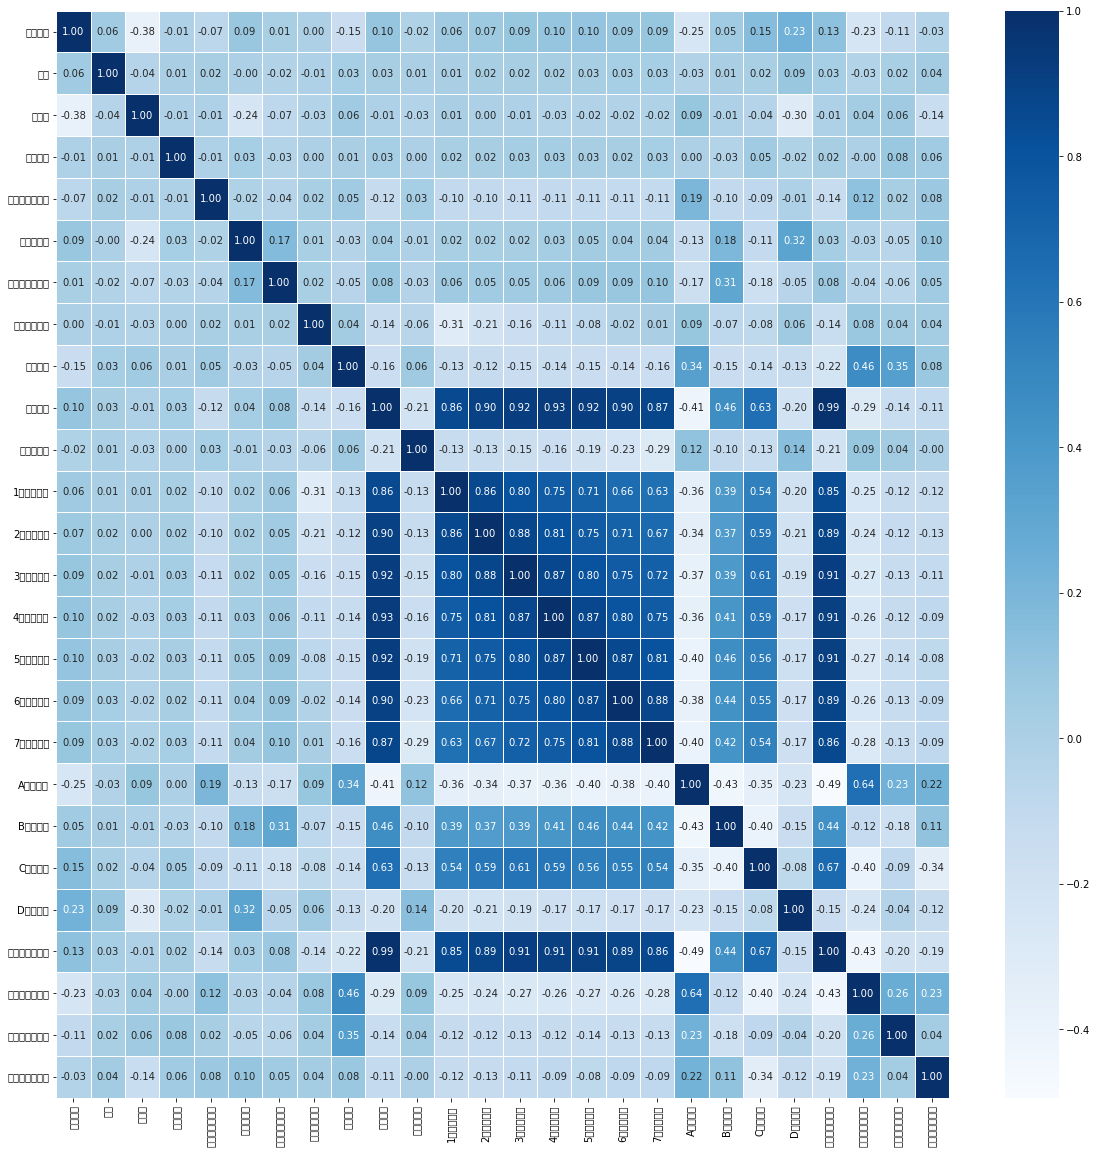

In [29]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumGothic')
plt.figure(figsize=(20,20))
sns.heatmap(data =df.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')

In [30]:
df.fillna(0,inplace=True)

In [31]:
from sklearn.preprocessing import StandardScaler
print(df.columns)
stcol=['총구매액', '구매빈도', '최근구매일', '1기구매횟수', '2기구매횟수', '3기구매횟수', '4기구매횟수',
       '5기구매횟수', '6기구매횟수', '7기구매횟수', 'A구매횟수', 'B구매횟수', 'C구매횟수', 'D구매횟수',
       '편의품구매횟수', '선매품구매횟수', '전문품구매횟수', '기타품구매횟수']

for i in stcol:
    sc = StandardScaler()
    sc.fit(df[[i]])
    df[i] = sc.transform(df[[i]])
df

Index(['고객번호', '성별', '연령대', '거주지역', '경쟁사이용횟수', '멤버쉽보유', '온라인이용횟수', '분기증감확인',
       '총구매액', '구매빈도', '최근구매일', '1기구매횟수', '2기구매횟수', '3기구매횟수', '4기구매횟수',
       '5기구매횟수', '6기구매횟수', '7기구매횟수', 'A구매횟수', 'B구매횟수', 'C구매횟수', 'D구매횟수',
       '편의품구매횟수', '선매품구매횟수', '전문품구매횟수', '기타품구매횟수'],
      dtype='object')


,고객번호,성별,연령대,거주지역,경쟁사이용횟수,멤버쉽보유,온라인이용횟수,분기증감확인,총구매액,구매빈도,...,6기구매횟수,7기구매횟수,A구매횟수,B구매횟수,C구매횟수,D구매횟수,편의품구매횟수,선매품구매횟수,전문품구매횟수,기타품구매횟수
0,1,1,5,1,15,0,0,0,0.882466,-0.486475,...,-0.526668,-1.057208,1.852548,-0.770083,-0.413988,-0.119240,-0.712711,1.751625,-0.258874,0.365534
1,2,1,5,0,8,0,0,0,1.085480,-0.460644,...,-0.733365,-0.608109,2.352193,-0.830894,-0.548111,0.589962,-0.591546,1.358218,0.189470,-0.534761
2,3,1,5,0,0,0,0,0,-0.504895,-0.315702,...,-0.586955,-0.497952,-0.888748,-0.850243,0.837404,-0.119240,-0.079963,-1.179254,-0.370960,-0.934893
3,4,0,5,1,3,0,0,0,-0.277588,-0.710346,...,-0.518056,-0.675897,1.038937,-0.691304,-0.378560,-0.119240,-0.683093,0.030471,-0.258874,0.290509
4,6,0,5,3,0,0,0,1,-0.162595,0.080377,...,-0.354421,0.256196,0.147678,0.566393,-0.498764,-0.119240,0.006198,0.355031,0.189470,0.340526
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18861,19333,0,1,0,0,1,5,0,-0.481534,-0.838067,...,-1.034798,-1.311416,0.373869,-0.466024,-0.536724,2.362969,-0.735597,-1.120243,-0.370960,1.991067
18862,19334,1,2,3,30,1,0,0,-0.342238,0.858184,...,-0.268298,-1.404625,-0.881996,1.439871,-0.226722,-0.119240,0.944549,-0.776012,-0.370960,-0.534761
18863,19335,0,2,0,0,1,0,1,-0.285773,0.466410,...,0.291506,0.095198,-0.858364,0.920207,-0.105252,-0.119240,0.314494,0.050141,-0.370960,2.241149
18864,19336,0,2,1,0,0,0,1,-0.082462,-1.333165,...,-1.448191,-1.243627,0.404253,-0.851626,-0.548111,0.022600,-1.484124,0.423878,0.077384,3.241477


In [32]:
%%time
import pandas as pd
import warnings
warnings.simplefilter("ignore")
dfd = pd.read_csv('C:/1차data/CV_대분류.csv',encoding='cp949')
dfd


Wall time: 57 ms


,고객번호,편의품_CV_S,편의품_CV_C,선매품CV_S,선매품CV_C,전문품CV_S,전문품CV_C,기타CV_S,기타CV_C
0,1,0.423231,0.450363,0.415863,0.187114,1.356745,1.247219,0.491980,0.490667
1,2,0.404963,0.217903,0.395417,0.260345,2.099585,2.094437,1.196030,0.864521
2,3,0.355232,0.336062,1.945495,1.707825,0.000000,0.000000,0.000000,0.000000
3,4,0.267522,0.299495,0.539876,0.435087,2.645751,2.645751,0.615895,0.628138
4,6,0.336680,0.184807,0.255509,0.323405,1.282600,1.058301,0.237022,0.351850
...,...,...,...,...,...,...,...,...,...
18861,19333,0.531012,0.433746,1.413875,1.466643,0.000000,0.000000,0.577843,0.269152
18862,19334,0.710300,0.680638,1.111205,0.501125,0.000000,0.000000,1.097728,1.032669
18863,19335,0.285949,0.294746,0.581560,0.482012,0.000000,0.000000,1.239736,0.426265
18864,19336,1.110957,0.694073,0.582518,0.429805,1.398080,1.376893,0.570862,0.592007


In [33]:
df=pd.merge(df,dfd, on='고객번호',how='left')
df

,고객번호,성별,연령대,거주지역,경쟁사이용횟수,멤버쉽보유,온라인이용횟수,분기증감확인,총구매액,구매빈도,...,전문품구매횟수,기타품구매횟수,편의품_CV_S,편의품_CV_C,선매품CV_S,선매품CV_C,전문품CV_S,전문품CV_C,기타CV_S,기타CV_C
0,1,1,5,1,15,0,0,0,0.882466,-0.486475,...,-0.258874,0.365534,0.423231,0.450363,0.415863,0.187114,1.356745,1.247219,0.491980,0.490667
1,2,1,5,0,8,0,0,0,1.085480,-0.460644,...,0.189470,-0.534761,0.404963,0.217903,0.395417,0.260345,2.099585,2.094437,1.196030,0.864521
2,3,1,5,0,0,0,0,0,-0.504895,-0.315702,...,-0.370960,-0.934893,0.355232,0.336062,1.945495,1.707825,0.000000,0.000000,0.000000,0.000000
3,4,0,5,1,3,0,0,0,-0.277588,-0.710346,...,-0.258874,0.290509,0.267522,0.299495,0.539876,0.435087,2.645751,2.645751,0.615895,0.628138
4,6,0,5,3,0,0,0,1,-0.162595,0.080377,...,0.189470,0.340526,0.336680,0.184807,0.255509,0.323405,1.282600,1.058301,0.237022,0.351850
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18861,19333,0,1,0,0,1,5,0,-0.481534,-0.838067,...,-0.370960,1.991067,0.531012,0.433746,1.413875,1.466643,0.000000,0.000000,0.577843,0.269152
18862,19334,1,2,3,30,1,0,0,-0.342238,0.858184,...,-0.370960,-0.534761,0.710300,0.680638,1.111205,0.501125,0.000000,0.000000,1.097728,1.032669
18863,19335,0,2,0,0,1,0,1,-0.285773,0.466410,...,-0.370960,2.241149,0.285949,0.294746,0.581560,0.482012,0.000000,0.000000,1.239736,0.426265
18864,19336,0,2,1,0,0,0,1,-0.082462,-1.333165,...,0.077384,3.241477,1.110957,0.694073,0.582518,0.429805,1.398080,1.376893,0.570862,0.592007


In [34]:
X =df.drop(['고객번호','분기증감확인'],axis=1)
y=df[['분기증감확인']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=10)
X

,성별,연령대,거주지역,경쟁사이용횟수,멤버쉽보유,온라인이용횟수,총구매액,구매빈도,최근구매일,1기구매횟수,...,전문품구매횟수,기타품구매횟수,편의품_CV_S,편의품_CV_C,선매품CV_S,선매품CV_C,전문품CV_S,전문품CV_C,기타CV_S,기타CV_C
0,1,5,1,15,0,0,0.882466,-0.486475,1.167623,-0.460997,...,-0.258874,0.365534,0.423231,0.450363,0.415863,0.187114,1.356745,1.247219,0.491980,0.490667
1,1,5,0,8,0,0,1.085480,-0.460644,-0.267878,0.128798,...,0.189470,-0.534761,0.404963,0.217903,0.395417,0.260345,2.099585,2.094437,1.196030,0.864521
2,1,5,0,0,0,0,-0.504895,-0.315702,1.167623,-0.292484,...,-0.370960,-0.934893,0.355232,0.336062,1.945495,1.707825,0.000000,0.000000,0.000000,0.000000
3,0,5,1,3,0,0,-0.277588,-0.710346,-0.472949,-0.723127,...,-0.258874,0.290509,0.267522,0.299495,0.539876,0.435087,2.645751,2.645751,0.615895,0.628138
4,0,5,3,0,0,0,-0.162595,0.080377,-0.472949,0.203692,...,0.189470,0.340526,0.336680,0.184807,0.255509,0.323405,1.282600,1.058301,0.237022,0.351850
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18861,0,1,0,0,1,5,-0.481534,-0.838067,-0.062806,-0.554615,...,-0.370960,1.991067,0.531012,0.433746,1.413875,1.466643,0.000000,0.000000,0.577843,0.269152
18862,1,2,3,30,1,0,-0.342238,0.858184,5.884266,-0.358017,...,-0.370960,-0.534761,0.710300,0.680638,1.111205,0.501125,0.000000,0.000000,1.097728,1.032669
18863,0,2,0,0,1,0,-0.285773,0.466410,-0.472949,-0.704404,...,-0.370960,2.241149,0.285949,0.294746,0.581560,0.482012,0.000000,0.000000,1.239736,0.426265
18864,0,2,1,0,0,0,-0.082462,-1.333165,0.552408,-1.518882,...,0.077384,3.241477,1.110957,0.694073,0.582518,0.429805,1.398080,1.376893,0.570862,0.592007


In [35]:
%%time

def est(y_test,pred,pred_proba):
    con=confusion_matrix(y_test,pred)
    acc=accuracy_score(y_test,pred)
    pre=precision_score(y_test,pred)
    rec=recall_score(y_test,pred)
    f1=f1_score(y_test,pred)
    roc=roc_auc_score(y_test,pred_proba)
    print('오차행렬\n',con.round(3))
    print('정확도 :',acc.round(3))
    print('정밀도 :',pre.round(3))
    print('재현율 :',rec.round(3))
    print('f1점수:',f1.round(3))
    print('roc_auc :',roc.round(3))
    print()
    print()
    
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train , y_train)
pred = dt_clf.predict(X_test)
pred_proba = dt_clf.predict_proba(X_test)[:,1]
print('결정트리')
est(y_test,pred,pred_proba)

rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
pred_proba = rf_clf.predict_proba(X_test)[:,1]
print('랜덤포레스트')
est(y_test,pred,pred_proba)

                                                                  

lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
pred_proba = lr_clf.predict_proba(X_test)[:,1]
print('로지스틱회귀')
est(y_test,pred,pred_proba)

lgbm_wrapper = LGBMClassifier(n_estimators=400)
evals = [(X_test,y_test)]
lgbm_wrapper.fit(X_train, y_train, eval_set=evals, verbose=False)
pred = lgbm_wrapper.predict(X_test)
pred_proba = lgbm_wrapper.predict_proba(X_test)[:,1]
print('LGBM')
est(y_test,pred,pred_proba)


evals = [(X_test,y_test)]
xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3)
xgb_wrapper.fit(X_train,y_train, early_stopping_rounds = 100, eval_set=evals, eval_metric='logloss', verbose=False)
pred = xgb_wrapper.predict(X_test)
pred_proba = xgb_wrapper.predict_proba(X_test)[:,1]
print('XGB')
est(y_test,pred,pred_proba)


# svm_model = svm.SVC(kernel='linear',probability=True,C=1)
# svm_model.fit(X_train, y_train)
# pred = svm_model.predict(X_test)
# pred_proba = svm_model.predict_proba(X_test)[:,1]
# print('SVM')
# est(y_test,pred,pred_proba)


# k_model = KNeighborsClassifier(n_neighbors=40)
# k_model.fit(X_train,y_train)
# pred = k_model.predict(X_test)
# pred_proba = k_model.predict_proba(X_test)[:,1]
# print('KNN')
# est(y_test,pred,pred_proba)



# lr_clf = LogisticRegression()
# knn_clf = KNeighborsClassifier(n_neighbors=8)
# vo_clf = VotingClassifier( estimators=[('LR',lr_clf),('KNN',knn_clf)] , voting='soft' )
# vo_clf.fit(X_train , y_train)
# pred = vo_clf.predict(X_test)
# pred_proba = vo_clf.predict_proba(X_test)[:,1]
# print('KNN + 로지스틱회귀 앙상블')
# est(y_test,pred,pred_proba)


결정트리
오차행렬
 [[1445  672]
 [ 730  927]]
정확도 : 0.629
정밀도 : 0.58
재현율 : 0.559
f1점수: 0.569
roc_auc : 0.621


랜덤포레스트
오차행렬
 [[1713  404]
 [ 762  895]]
정확도 : 0.691
정밀도 : 0.689
재현율 : 0.54
f1점수: 0.606
roc_auc : 0.751


로지스틱회귀
오차행렬
 [[1648  469]
 [ 694  963]]
정확도 : 0.692
정밀도 : 0.672
재현율 : 0.581
f1점수: 0.624
roc_auc : 0.758


LGBM
오차행렬
 [[1632  485]
 [ 701  956]]
정확도 : 0.686
정밀도 : 0.663
재현율 : 0.577
f1점수: 0.617
roc_auc : 0.749


XGB
오차행렬
 [[1702  415]
 [ 731  926]]
정확도 : 0.696
정밀도 : 0.691
재현율 : 0.559
f1점수: 0.618
roc_auc : 0.761


Wall time: 12.7 s
